In [14]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.sans-serif": ["Helvetica"]
})
plt.rcParams['figure.dpi'] = 900

path_to_results = mt.ROOT_DIR / 'results' / 'height'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

In [15]:
df = fulldf[fulldf.n_shot == 16]
df = df[df.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df.sort_values(by='height')
df.value = df.value.astype(np.float)

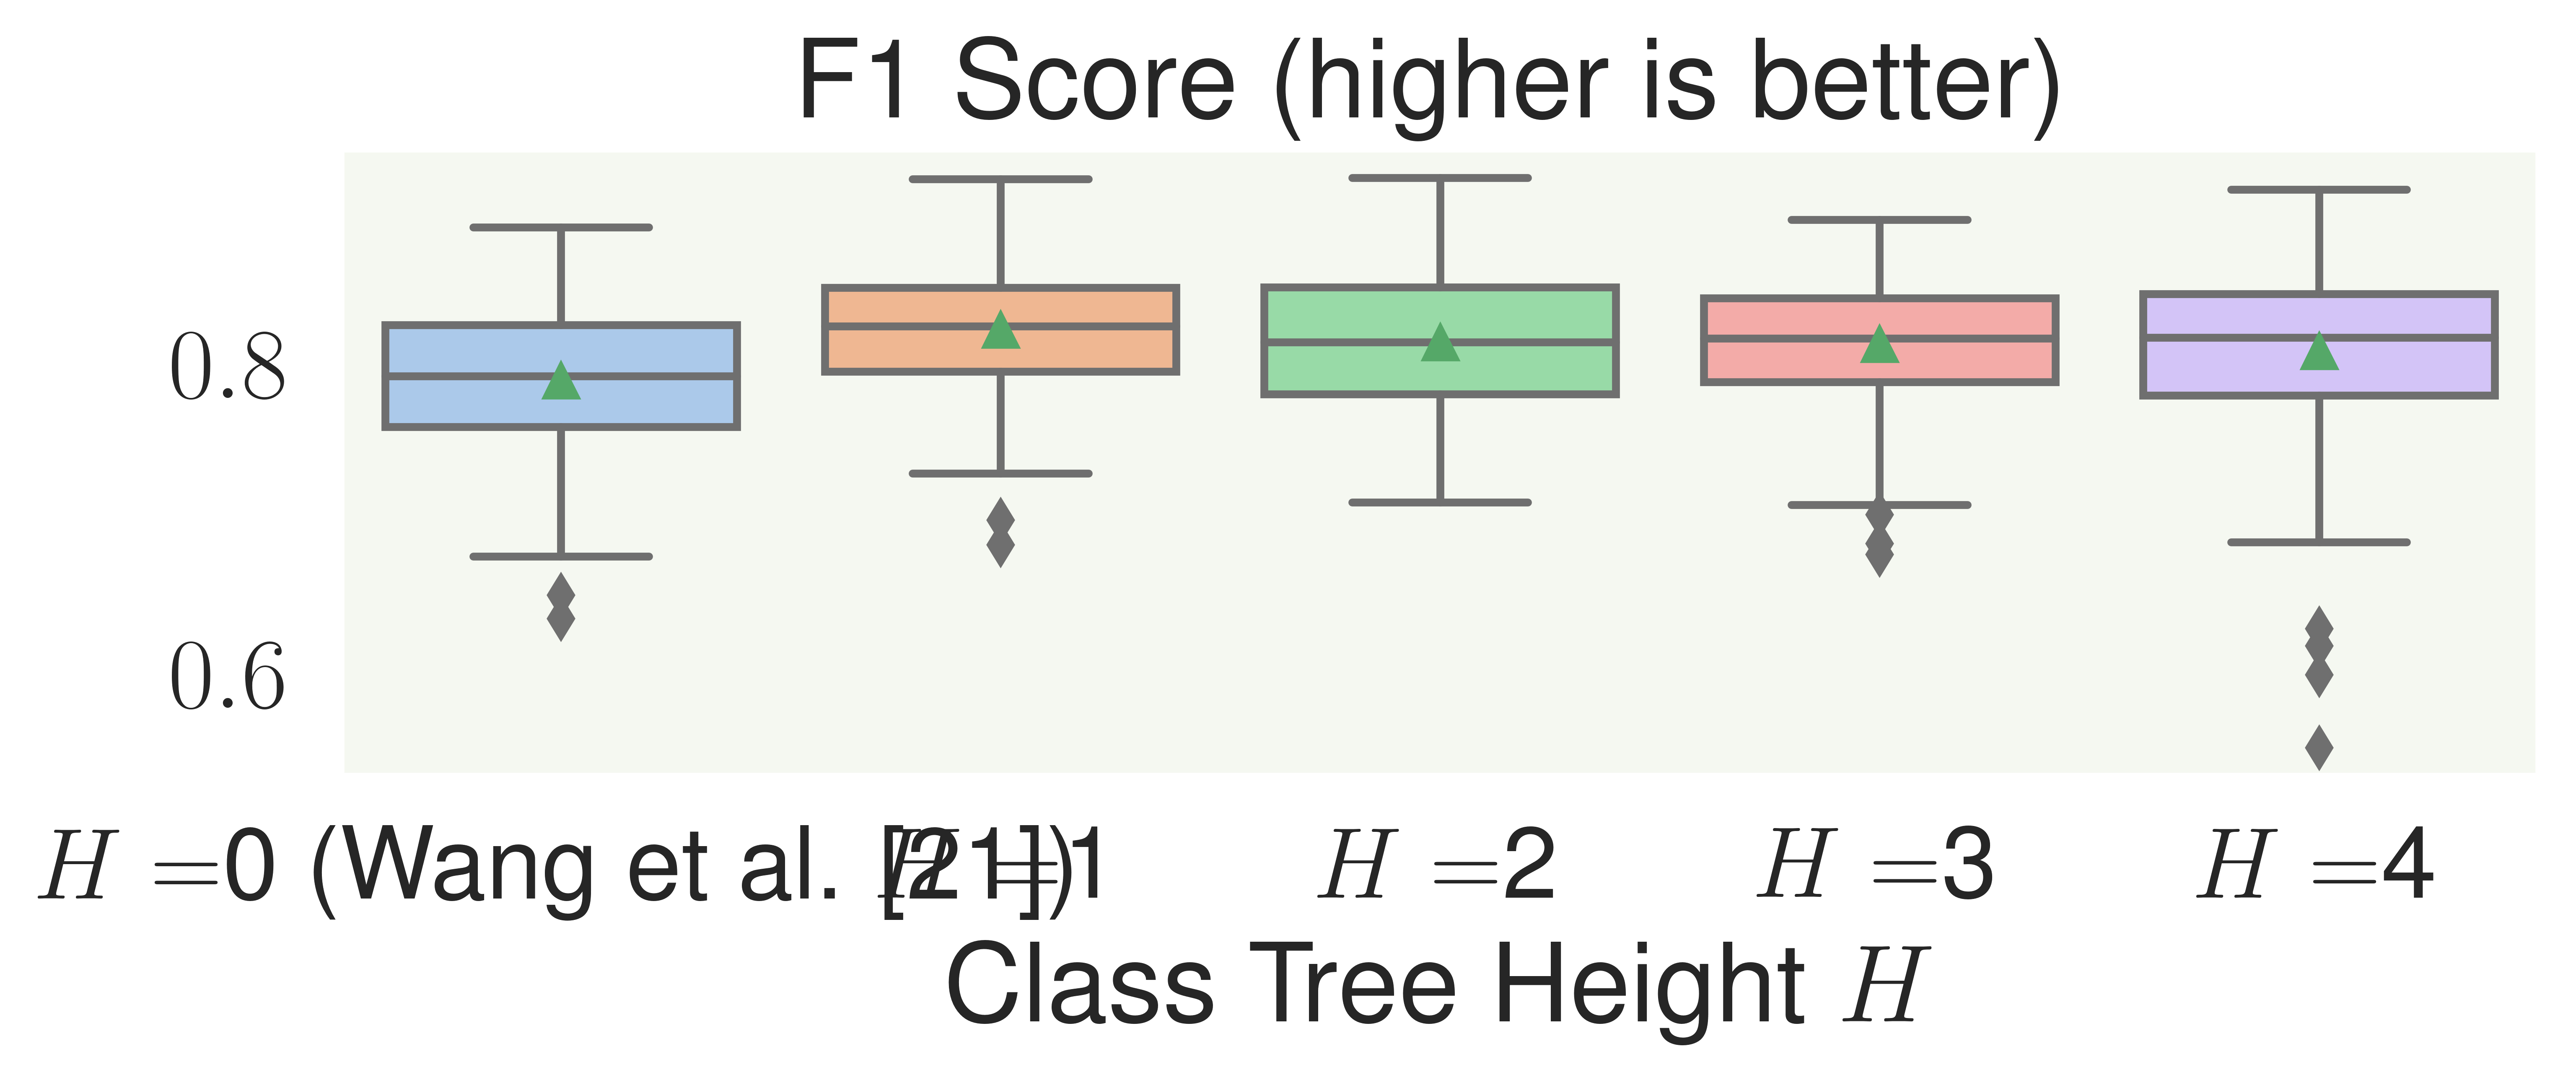

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,3)


sns.boxplot(data=df, x='name', y='value',  palette="pastel", showmeans=True)
# plt.title('F1 Micro')
plt.title('F1 Score (higher is better)')
plt.xlabel('Class Tree Height $H$')
plt.ylabel('')
plt.tight_layout()
plt.grid(axis='y',  linestyle='--')

fig = plt.gcf()
fig.axes[0].set_facecolor('#F5F8F1')
fig.savefig(output_dir / 'height-vs-f1.png')
plt.close()
fig

2021-05-14:13:00:19,501 WARNING  [font_manager.py:1357] findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


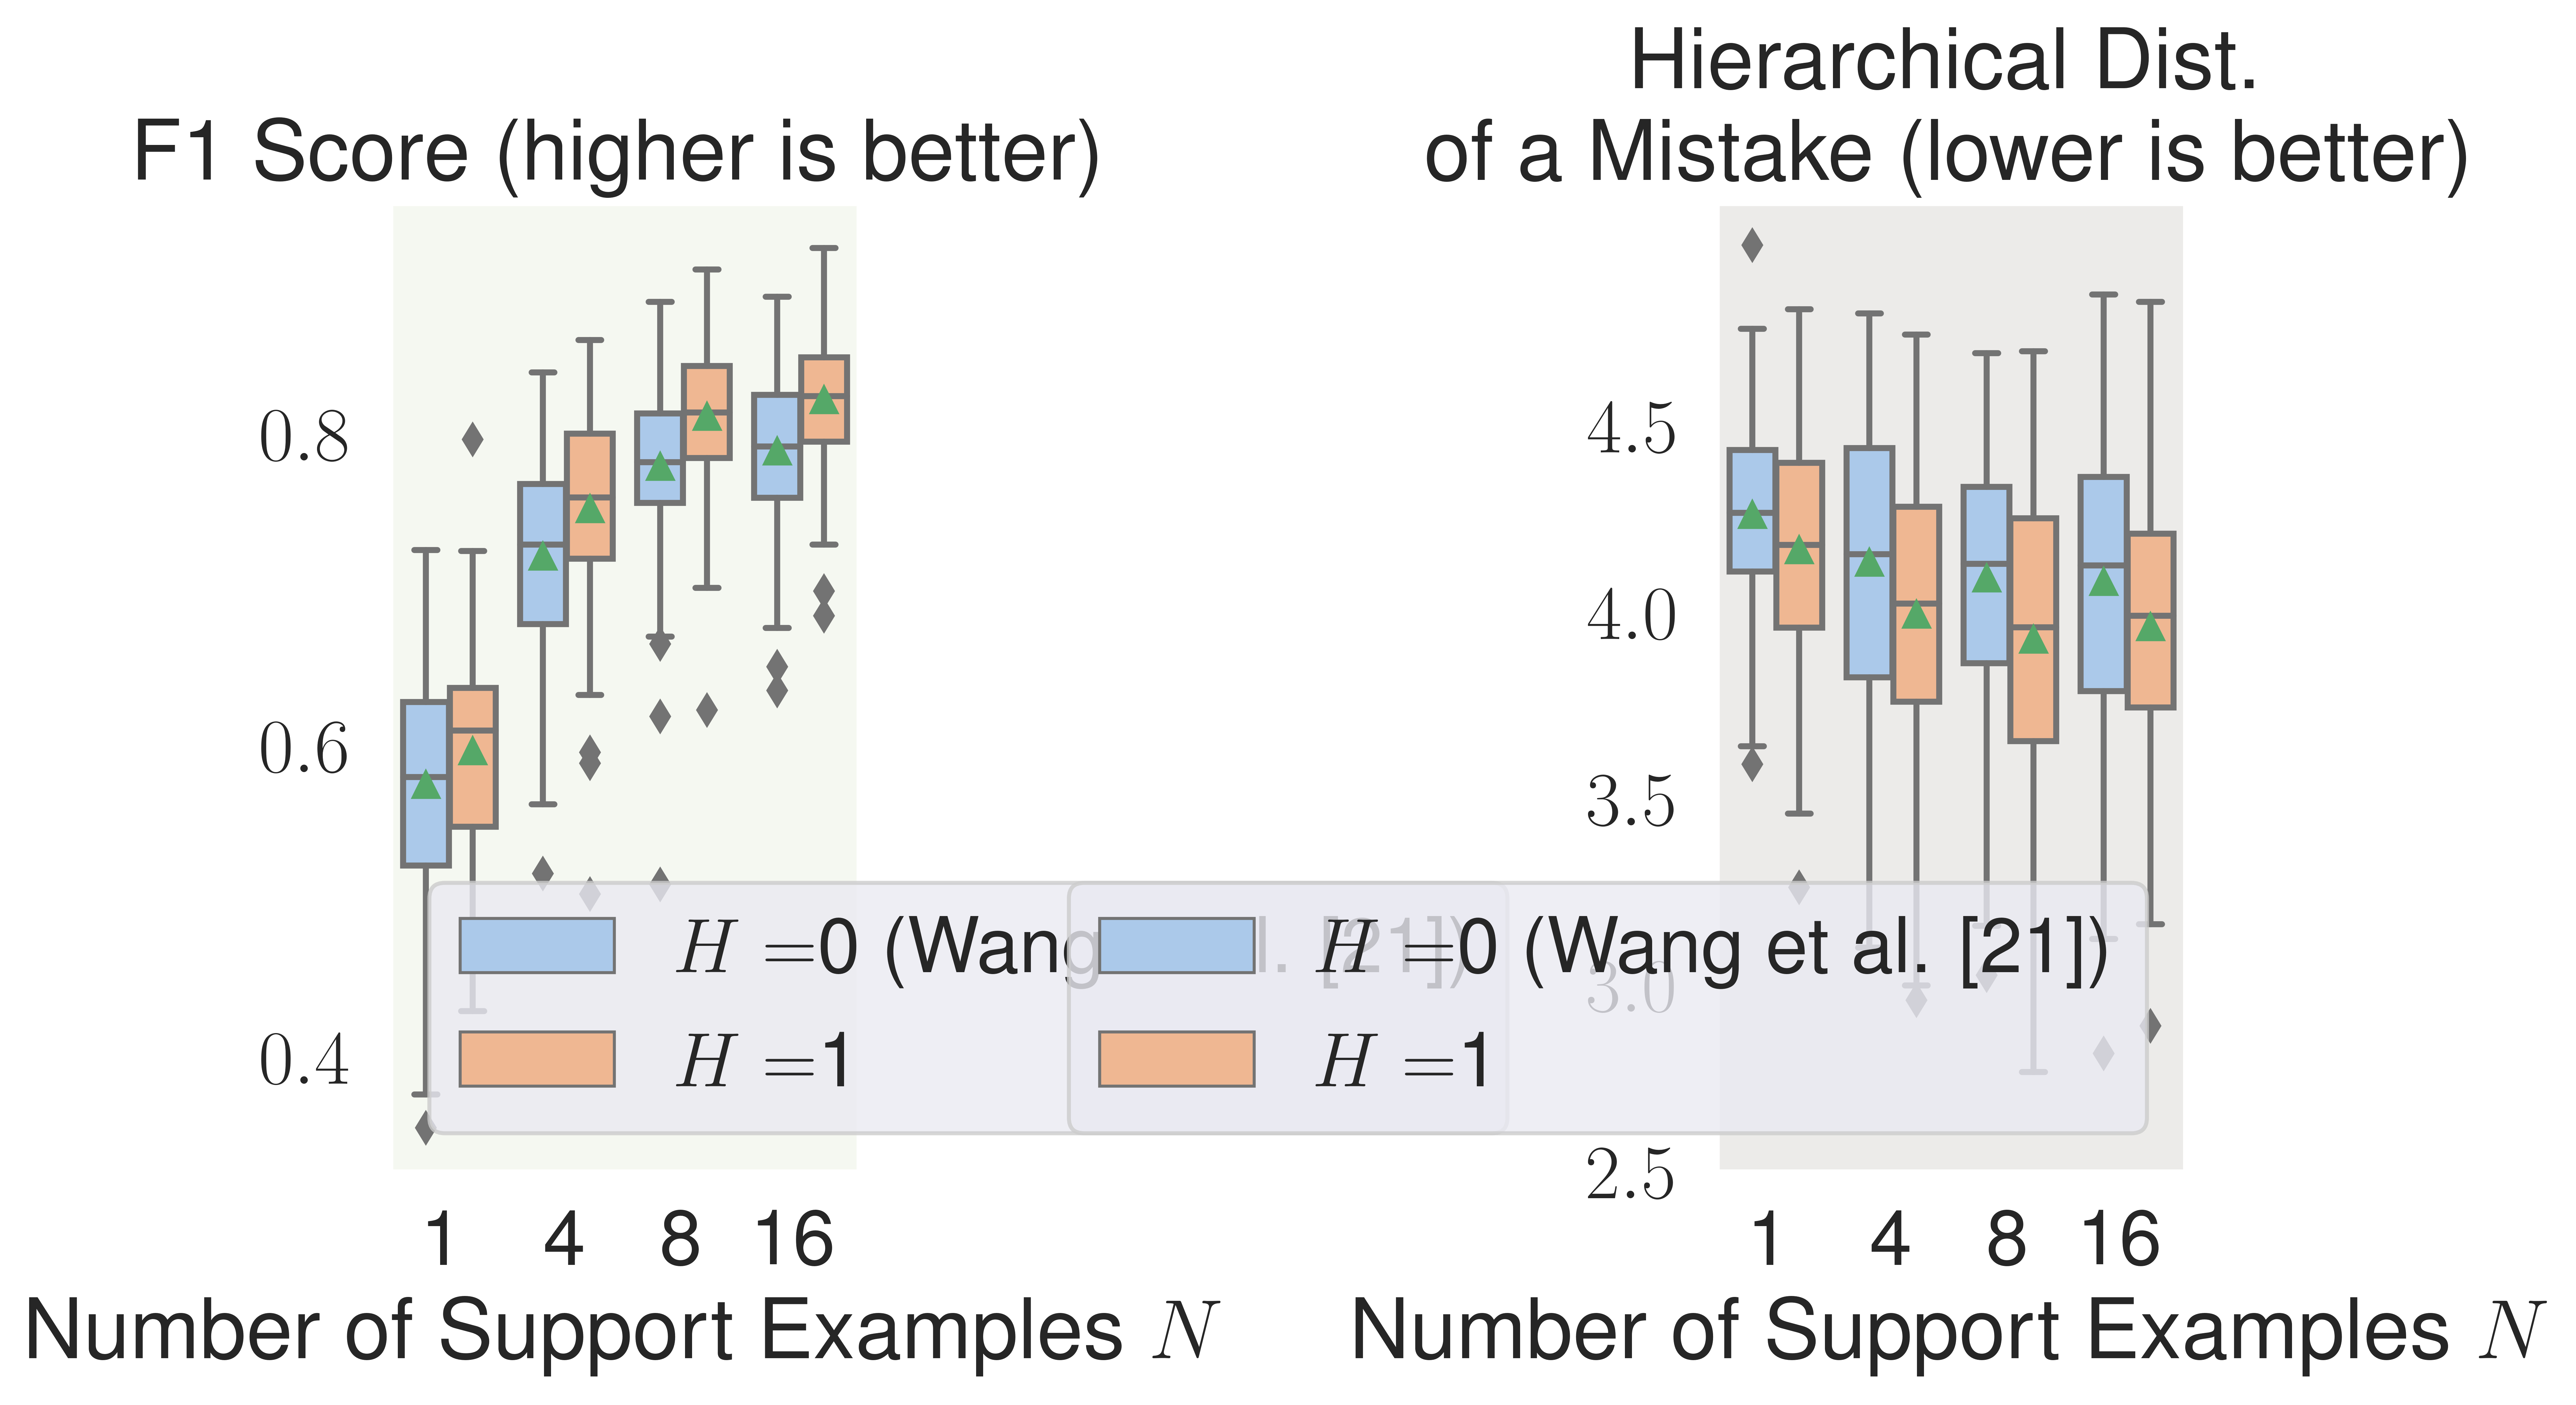

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharex=True)

def remove_legend_title(ax):
    ax.get_legend().set_title(None)
    return ax

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value.astype(np.float)

sns.boxplot(ax=axes[0], data=df, x='n_shot', y='value', hue='name', palette="pastel", showmeans=True)
axes[0].set_title('F1 Score (higher is better)')
axes[0].set_xlabel('Number of Support Examples $N$')
axes[0].set_ylabel('')
axes[0].set_facecolor('#F5F8F1')
axes[0].grid(axis='y',  linestyle='--')
remove_legend_title(axes[0])

# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value.astype(np.float)

sns.boxplot(data=df, ax=axes[1], x='n_shot', y='value',  hue='name', palette="pastel", showmeans=True)
axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
axes[1].set_xlabel('Number of Support Examples $N$')
axes[1].set_yticks(np.arange(2.5, 5, 0.5))
axes[1].set_ylabel('')
axes[1].set_facecolor('#ECEBE9')
axes[1].grid(axis='y',  linestyle='--')
remove_legend_title(axes[1])

plt.tight_layout()
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'n_shot-vs-f1-hlca.png')
fig

In [18]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'scrambled-edit'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()

- Figure 3: we pick the best n_shot and the best height, and we compare with 10 other random hierarchies. We don't want to show boxplots for all 10 of these random hierarchies, so we pick the best and the worst. This figure has 4 boxplots: random-best, random-worst, proposed and baseline.
The 10 random models are almost done training. Do you want to be in charge of running eval, analysis on the random taxonomies + proposed + baseline, picking the best/worst random hierarchies, and making the boxplot for that?

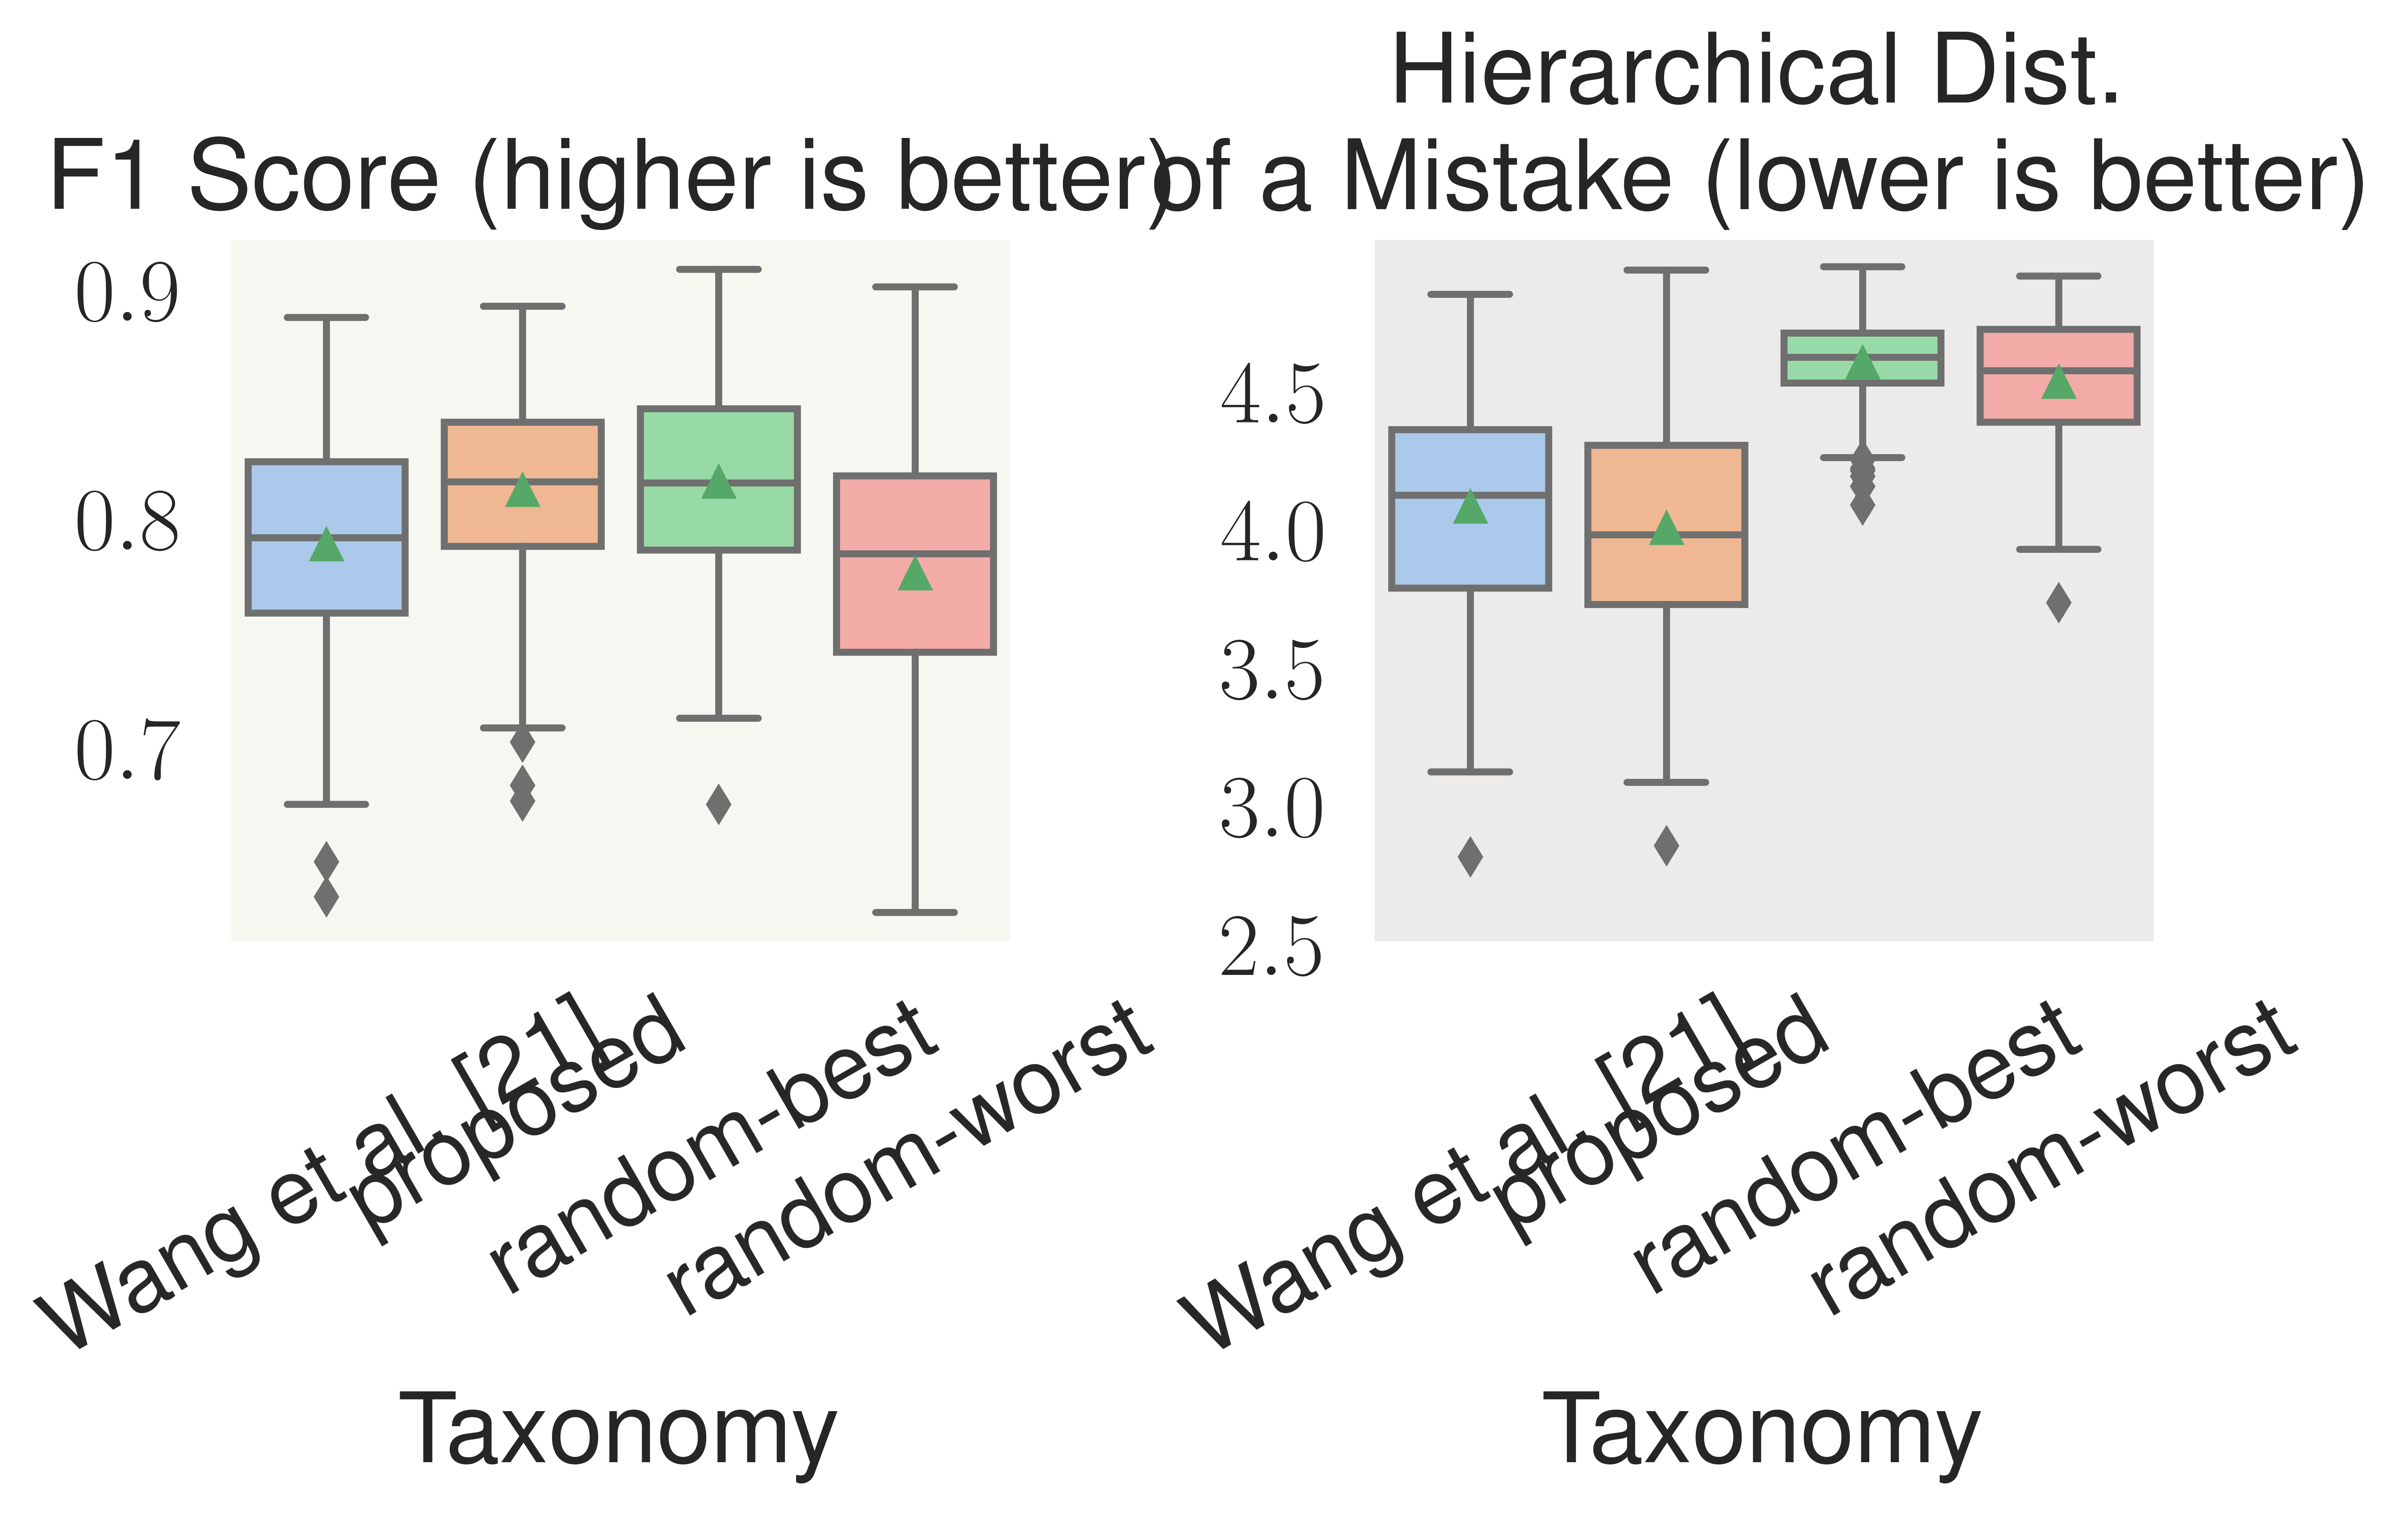

In [19]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'scrambled-edit'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()
fulldf
fig, axes = plt.subplots(1, 2, figsize=(7, 5), sharex=True)
plt.xlabel('Taxonomy')

# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
# df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='name')
df.value = df.value.astype(np.float)

sns.boxplot(ax=axes[0], data=df, x='name', y='value', palette="pastel", showmeans=True)
axes[0].set_title('F1 Score (higher is better)')
axes[0].set_xlabel('Taxonomy')
axes[0].set_ylabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=30)
axes[0].set_facecolor('#F5F8F1')
axes[0].grid(axis='y',  linestyle='--')

###
# Bulbasaur
df = fulldf[fulldf.metric == 'hlca-mistake']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
df = df.sort_values(by='name')
df.value = df.value 
df.value = df.value.astype(np.float)

sns.boxplot(data=df, ax=axes[1], x='name', y='value', palette="pastel", showmeans=True)
axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
# axes[1].set_ylim([0.5, 1.0])
axes[1].set_xlabel('Taxonomy')
axes[1].set_yticks(np.arange(2.5, 5, 0.5))
axes[1].set_ylabel('')
axes[1].set_xticklabels(df.name.unique(), rotation=45)
axes[1].set_facecolor('#ECEBE9')
axes[1].grid(axis='y',  linestyle='--')


###

plt.tight_layout()
plt.xticks(rotation=30)
plt.xlabel('Taxonomy')
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'random.png')
fig

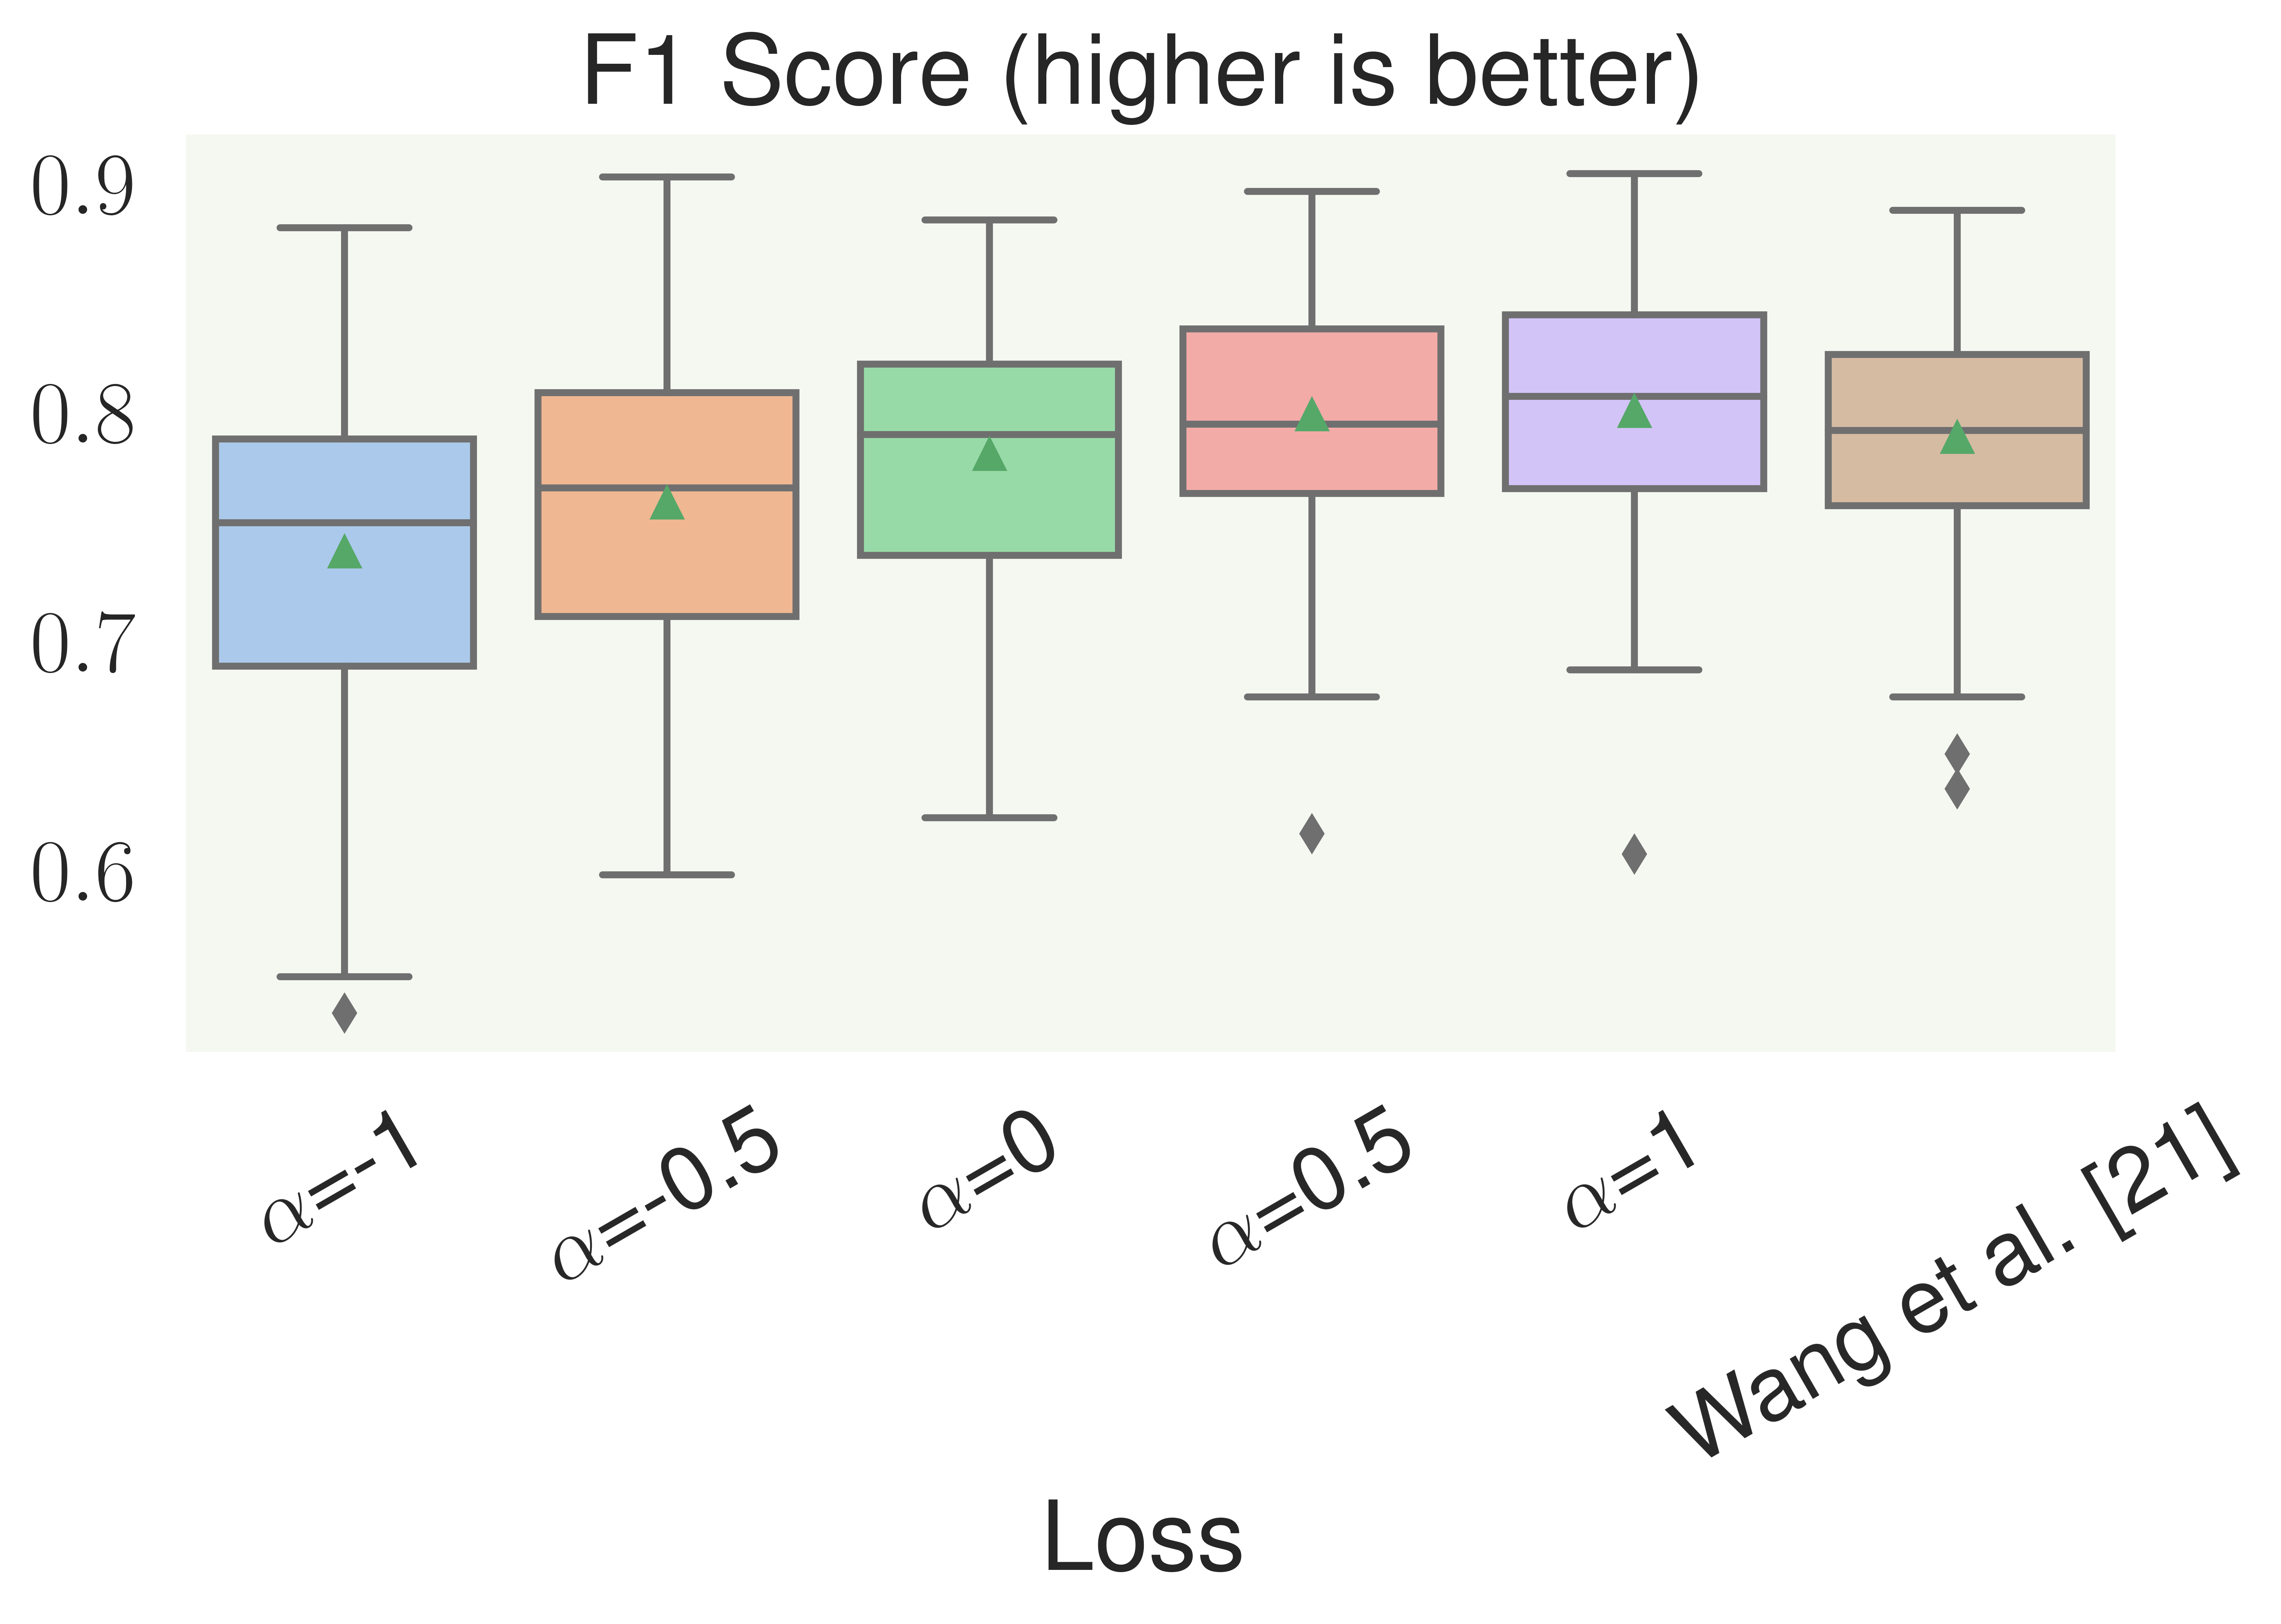

In [20]:
import music_trees as mt
import glob
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'font.size': 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

path_to_results = mt.ROOT_DIR / 'results' / 'alpha'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()
fulldf
fig, axes = plt.subplots(1, 1, figsize=(7, 5), sharex=True)
plt.xlabel('Taxonomy')


# Charmander
df = fulldf[fulldf.metric == 'f1_micro']
df = df[df.tag == 'protonet']
df = df[df.n_shot == 16]
# df = df[(df.height == 1) | (df.height == 0)]
df = df.sort_values(by='loss_alpha')
df.value = df.value.astype(np.float)


sns.boxplot(ax=axes, data=df, x='name', y='value', palette="pastel", showmeans=True)
axes.set_title('F1 Score (higher is better)')
axes.set_xlabel('Loss')
axes.set_ylabel('')
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)
axes.set_facecolor('#F5F8F1')
axes.grid(axis='y',  linestyle='--')

###
# Bulbasaur
# df = fulldf[fulldf.metric == 'hlca-mistake']
# df = df[df.tag == 'protonet']
# df = df[df.n_shot == 16]
# df = df.sort_values(by='loss_alpha')
# df.value = df.value 

# sns.boxplot(data=df, ax=axes[1], x='name', y='value', palette="pastel", showmeans=True)
# axes[1].set_title('Hierarchical Dist. \nof a Mistake (lower is better)')
# # axes[1].set_ylim([0.3, 1.0])
# axes[1].set_xlabel('Loss')
# axes[1].set_ylabel('')
# axes[1].set_xticklabels(df.name.unique(), rotation=60)
# axes[1].set_facecolor('#ECEBE9')
# axes[1].grid(axis='y',  linestyle='--')


# ###

plt.tight_layout()

plt.xlabel('Loss')
fig = plt.gcf()
plt.close()
fig.savefig(output_dir / 'alpha.png')
fig

In [21]:
short_inst_list = ['Flute',
 'Yangqin',
 'Liuqin',
 'A. Guitar',
 'Drum set',
 'Toms',
 'Clarinet',
 'Viola',
 'Harp',
 'Erhu',
 'Trmpt. Sect.',
 'Doumbek',
 'S. Sax.',
 'E. Piano',
 'Bassoon',
 'Melodica',
 'Bongo',
 'Piccolo',
 'M. Speaker',
 'Chimes',
 'M. Singer',
 'Tuba',
 'Gong',
 'Zhongruan',
 'Cymbal']

long_inst_list = ['Flute',
 'Yangqin',
 'Liuqin',
 'Acoustic guitar',
 'Drum set',
 'Toms',
 'Clarinet',
 'Viola',
 'Harp',
 'Erhu',
 'Trumpet section',
 'Doumbek',
 'Soprano saxophone',
 'Electric piano',
 'Bassoon',
 'Melodica',
 'Bongo',
 'Piccolo',
 'Male speaker',
 'Chimes',
 'Male singer',
 'Tuba',
 'Gong',
 'Zhongruan',
 'Cymbal']

long_to_short = {long.lower():short for long, short in zip(long_inst_list, short_inst_list)}

In [22]:
from sklearn.metrics import classification_report
import seaborn as sns

path_to_results = mt.ROOT_DIR / 'results' / '2columnfig'
output_dir = mt.ROOT_DIR / 'scripts' / 'figures'
output_dir.mkdir(exist_ok=True)
filepaths = glob.glob(
    str(Path(path_to_results) / '**/*.csv'), recursive=True)
fulldf = pd.concat([pd.read_csv(fp) for fp in filepaths], ignore_index=True)
fulldf = fulldf.drop_duplicates()
fulldf

def val2list(vals):
    out = []
    for val in vals:
        out.extend(eval(val))

    return out

def get_f1s_dict(name):
    subset = fulldf[(fulldf.name == name) & (fulldf.n_shot == 8) & (fulldf.tag == 'protonet')]
    subset_pred = subset[subset.metric == 'preds']
    subset_truth = subset[subset.metric == 'target']
    ppreds = val2list(subset_pred.value)
    ptarg = val2list(subset_truth.value)

    pclasslist = list(set(ptarg))
    print(pclasslist)
    report = classification_report(ptarg, ppreds, labels=pclasslist, output_dict=True)
    report = {k: v for k, v in report.items() if k in pclasslist}
    f1s = {k: v['f1-score'] for k, v in report.items()}
    return f1s

proposed_f1s = get_f1s_dict('proposed')
baseline_f1s = get_f1s_dict('baseline')

assert baseline_f1s.keys() == proposed_f1s.keys()

differences = {k1: v1 - v2 for (k1, v1), (k2, v2) in zip(proposed_f1s.items(), baseline_f1s.items())}

predf = [{'instrument': long_to_short[k], 'f1 score difference': v} for k, v in differences.items()]
diffdf = pd.DataFrame(predf)
diffdf

['bongo', 'male singer', 'drum set', 'liuqin', 'tuba', 'harp', 'piccolo', 'cymbal', 'doumbek', 'gong', 'melodica', 'viola', 'erhu', 'electric piano', 'yangqin', 'male speaker', 'chimes', 'soprano saxophone', 'toms', 'clarinet', 'flute', 'zhongruan', 'acoustic guitar', 'bassoon']
['bongo', 'male singer', 'drum set', 'liuqin', 'tuba', 'harp', 'piccolo', 'cymbal', 'doumbek', 'gong', 'melodica', 'viola', 'erhu', 'electric piano', 'yangqin', 'male speaker', 'chimes', 'soprano saxophone', 'toms', 'clarinet', 'flute', 'zhongruan', 'acoustic guitar', 'bassoon']


instrument  f1 score difference
0        Bongo            -0.000149
1    M. Singer            -0.004612
2     Drum set             0.089313
3       Liuqin             0.062457
4         Tuba             0.037829
5         Harp             0.054648
6      Piccolo            -0.023755
7       Cymbal             0.024011
8      Doumbek             0.007390
9         Gong            -0.036724
10    Melodica             0.045419
11       Viola             0.025939
12        Erhu             0.085066
13    E. Piano             0.002646
14     Yangqin             0.039761
15  M. Speaker             0.066678
16      Chimes            -0.009732
17     S. Sax.            -0.068629
18        Toms             0.026350
19    Clarinet             0.017596
20       Flute             0.032994
21   Zhongruan             0.165674
22   A. Guitar             0.057061
23     Bassoon             0.025229

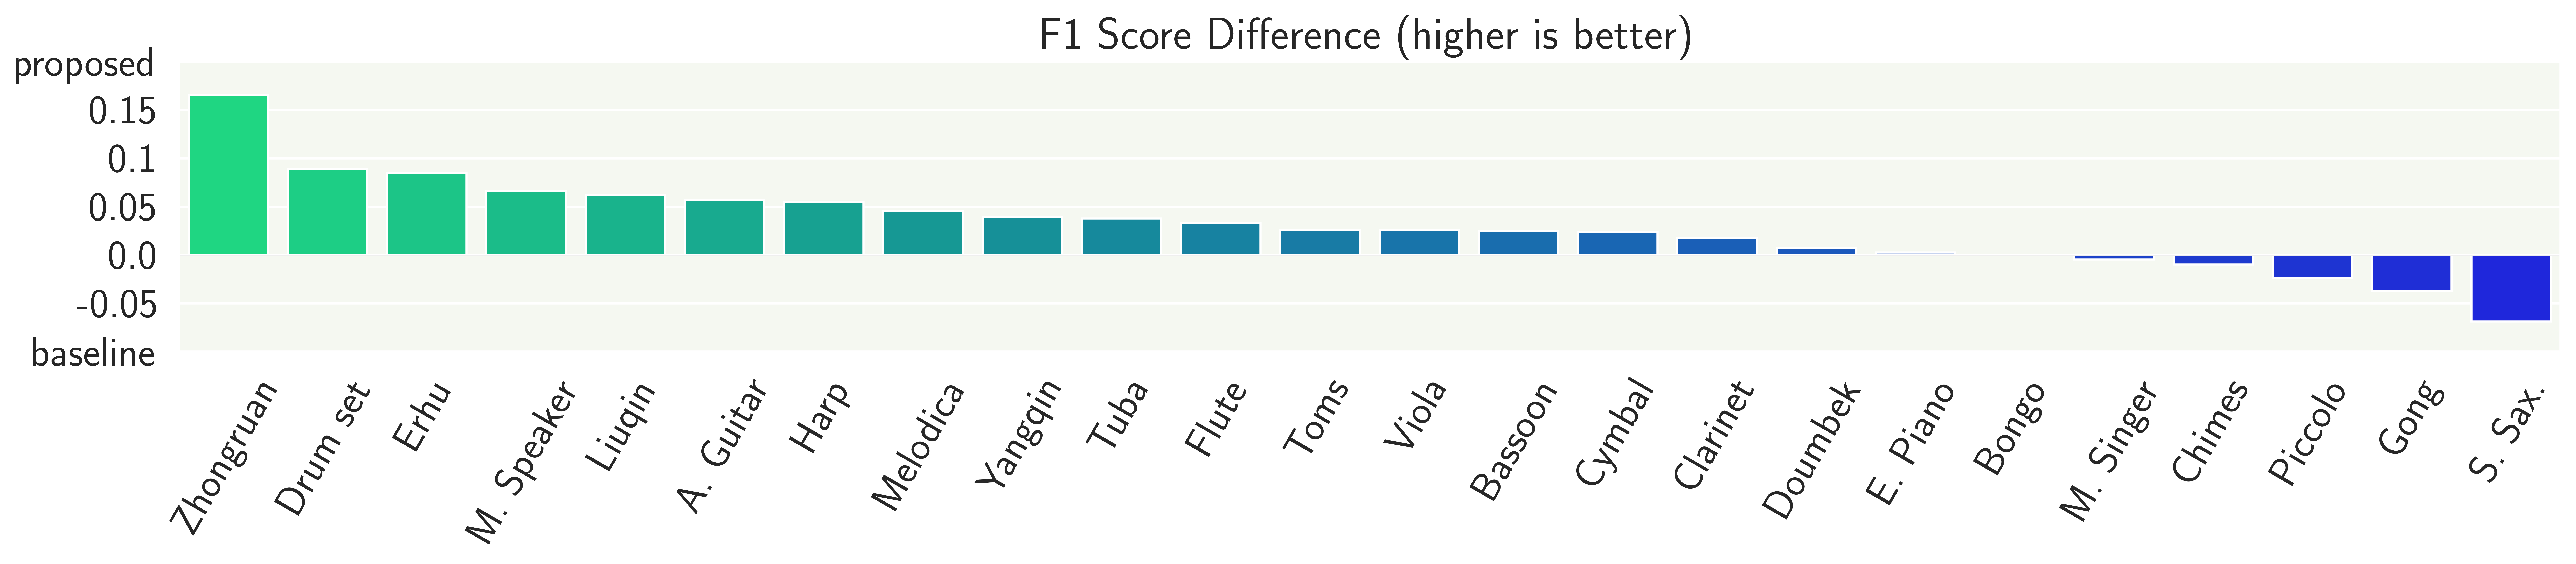

In [23]:
sns.set(font_scale=1.75)
fig, axes = plt.subplots(1, 1, figsize=(20, 2.5), sharex=True)

diffdf = diffdf.sort_values(by='f1 score difference', ascending=False)
graph=sns.barplot(
             x='instrument', 
             y='f1 score difference', 
             data=diffdf,
             palette='winter_r')


yticks = np.arange(-0.1, 0.2, 0.05)
ylabels = [str(np.around(t, 3)) for t in yticks]
ylabels[-1] = 'proposed'
ylabels[0] = 'baseline'
plt.yticks(yticks, ylabels)

axes.set_xticklabels(axes.get_xticklabels(),rotation=60)
axes.set_ylabel('')
plt.xlabel('')

axes.set_title('F1 Score Difference (higher is better)')

#axes.xaxis.set_visible(False)
#axes.yaxis.set_visible(False)


axes.set_facecolor('#F5F8F1')
axes.grid(b=True, axis='y')
#plt.tight_layout()
graph.axhline(0, color='black', linewidth=0.25)

axes.grid(b=True, axis='y')

fig.savefig(output_dir / '2columns.png')